In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\DEEPAK
[nltk_data]     LAGICHETTY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
pwd

'C:\\Users\\DEEPAK LAGICHETTY'

In [4]:
news_dataset_train = pd.read_csv("train-fake.csv")
news_dataset_test = pd.read_csv("test-fake.csv")

In [5]:
news_dataset_train.shape

(20800, 5)

In [6]:
news_dataset_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
news_dataset_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
news_dataset_train = news_dataset_train.fillna("")

In [9]:
news_dataset_train['content'] = news_dataset_train['title'] + ' ' + news_dataset_train['author']
print(news_dataset_train['content'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: content, Length: 20800, dtype: object


In [10]:
X = news_dataset_train.drop("label", axis = 1)
Y = news_dataset_train["label"]

In [11]:
port_stem = PorterStemmer()

In [12]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [13]:
news_dataset_train['content'] = news_dataset_train['content'].apply(stemming)

In [14]:
print(news_dataset_train['content'])

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object


In [15]:
X = news_dataset_train['content'].values
Y = news_dataset_train['label'].values

In [16]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [17]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train, Y_train)

LogisticRegression()

In [21]:
X_train_predictions = model.predict(X_train)
accuracy_training_data = accuracy_score(X_train_predictions, Y_train)
print(f"Accuracy score for training data: {accuracy_training_data}")

Accuracy score for training data: 0.9865985576923076


In [22]:
X_test_predictions = model.predict(X_test)
accuracy_test_data = accuracy_score(X_test_predictions, Y_test)
print(f"Accuracy score for test data: {accuracy_test_data}")

Accuracy score for test data: 0.9790865384615385


In [23]:
from sklearn.metrics import precision_score
precision = precision_score(Y_train, X_train_predictions)
print("Precision:", precision)

Precision: 0.9794204612655234


In [24]:
from sklearn.metrics import recall_score
recall = recall_score(Y_train, X_train_predictions)
print("Recall:", recall)

Recall: 0.9941176470588236


In [25]:
from sklearn.metrics import f1_score
f1_score = f1_score(Y_train, X_train_predictions)
print("F1_score:", f1_score)

F1_score: 0.9867143282692882


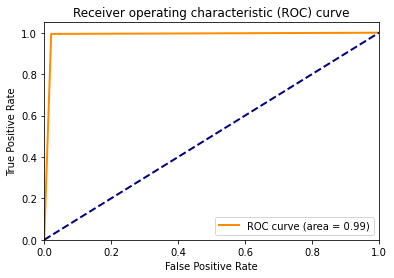

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_train, X_train_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
news_dataset_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [28]:
news_dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [29]:
news_dataset_test.shape

(5200, 4)

In [30]:
news_dataset_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [31]:
news_dataset_test = news_dataset_test.fillna(" ")

In [32]:
news_dataset_test['content'] = news_dataset_test['title'] + ' ' + news_dataset_test['author']

In [33]:
A = news_dataset_test['content'].values

In [34]:
A = vectorizer.transform(A)

A_predictions = model.predict(A)

print(A_predictions)

[0 1 1 ... 0 1 0]


In [35]:
predictions_df = pd.DataFrame(A_predictions)
predictions_df.columns =['label']
predictions_df.head()

,label
0,0
1,1
2,1
3,0
4,1


In [36]:
df = pd.concat([news_dataset_test["id"], predictions_df], axis=1)
df.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [37]:
df.to_csv("submission.csv", index = False)